<a href="https://colab.research.google.com/github/KhafillahAkbar/MachLearn_Ganjil_2023/blob/main/Assignment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense,Flatten
from sklearn.decomposition import PCA




In [72]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0


In [73]:
ann = tf.keras.models.Sequential()
ann.add(Flatten(input_shape=(28,28)))
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='softmax'))



In [74]:
ann.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [75]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2971 - accuracy: 0.9176
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1253 - accuracy: 0.9630
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0869 - accuracy: 0.9745
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0645 - accuracy: 0.9809
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0503 - accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0408 - accuracy: 0.9873
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0309 - accuracy: 0.9907
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0268 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0203 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.017

In [76]:
y_pred = ann.predict(X_test)
y_pred = y_pred.argmax(axis=1)


313/313 [==============================] - 1s 2ms/step


In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9788

Accuracy: 97.88%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Text(113.9222222222222, 0.5, 'predicted\xa0label')

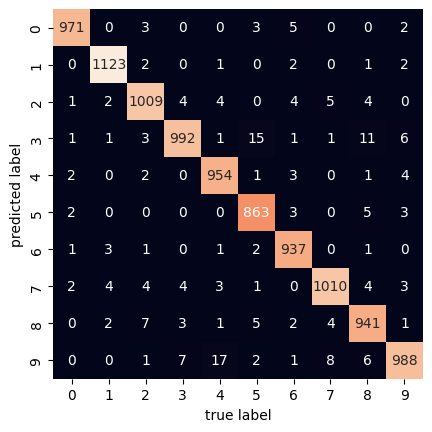

In [78]:

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
classification_rep = classification_report(y_test, y_pred)

# Generate confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)

accuracy_percentage = accuracy * 100

print(f'Accuracy: {accuracy_percentage:.2f}%')
print('Classification Report:\n', classification_rep)
sns.heatmap(confusion_mtx.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')